In [60]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from math import sqrt

In [62]:
df = pd.read_csv("MSN Historical Data.csv")

In [63]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,68500.0,67000.0,69400.0,66500.0,725370.0,0.02
1,12/4/2017,69000.0,70000.0,70000.0,68800.0,1190000.0,0.01
2,12/5/2017,68900.0,69000.0,70100.0,68600.0,777070.0,0.00
3,12/6/2017,67700.0,68900.0,69000.0,66000.0,1080000.0,-0.02
4,12/7/2017,69000.0,68600.0,69800.0,67300.0,1560000.0,0.02


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1249 non-null   object 
 1   Price     1249 non-null   float64
 2   Open      1249 non-null   float64
 3   High      1249 non-null   float64
 4   Low       1249 non-null   float64
 5   Vol.      1249 non-null   float64
 6   Change %  1249 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.4+ KB


In [65]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1249.000000
mean,84948.191353,84855.508407,86251.770216,83555.642114,1.337777e+06,0.000496
std,23451.518390,23499.743492,23939.497447,23088.419709,1.287888e+06,0.023910
min,39997.000000,39190.000000,40088.000000,37883.000000,5.748000e+04,-0.190000
25%,72915.000000,72669.000000,74100.000000,71521.000000,5.647000e+05,-0.010000
50%,84200.000000,84000.000000,85200.000000,82500.000000,9.966000e+05,0.000000
75%,100924.000000,100179.000000,103000.000000,99000.000000,1.620000e+06,0.010000
max,142286.000000,142286.000000,144768.000000,140218.000000,1.184000e+07,0.070000


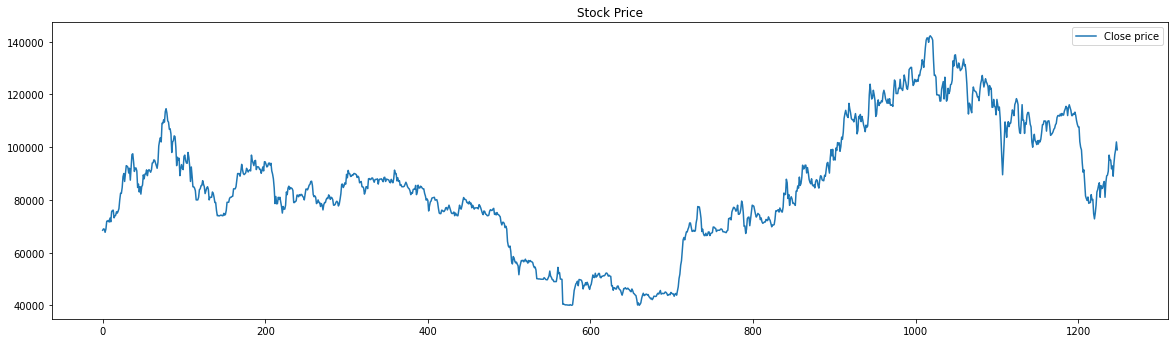

In [66]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Stock Price')
plt.plot(df.Price,label='Close price')
plt.legend()


In [67]:
stepwise_fit = auto_arima(df['Price'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22622.318, Time=1.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22630.427, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22628.778, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22628.749, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22628.598, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22627.775, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22632.111, Time=1.02 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22621.983, Time=0.87 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22622.176, Time=0.82 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=22622.908, Time=3.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22623.980, Time=2.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22622.066, Time=1.98 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=22620.963, Time=1.70 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=22618.971, Time=0.99 sec
 ARIMA(3,1,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1249
Model:               SARIMAX(4, 1, 0)   Log Likelihood              -11303.552
Date:                Wed, 04 Jan 2023   AIC                          22617.105
Time:                        18:58:33   BIC                          22642.751
Sample:                             0   HQIC                         22626.747
                               - 1249                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0497      0.018      2.823      0.005       0.015       0.084
ar.L2         -0.0028      0.022     -0.127      0.899      -0.046       0.041
ar.L3         -0.0651      0.019     -3.460      0.001      -0.102      -0.028
ar.L4          0.0662      0.018      3.645      0.000       0.031       0.102
sigma2      4.307e+06   1.19e+05     36.235      0.000    4.07e+06    4.54e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):               284.75
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
def split_data(data, test_split):
    length = len(data)
    size = round(length * (1 - test_split))
    train, test = data[:size], data[size:]
    print('train:', len(train))
    print('test:', len(test))
    return train, test

In [69]:
test_split = 0.2
train, test = split_data(df, test_split)

train: 999
test: 250


In [70]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
model = sm.tsa.arima.ARIMA(train['Price'], order = (4,1,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  999
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -8895.929
Date:                Wed, 04 Jan 2023   AIC                          17801.859
Time:                        18:58:34   BIC                          17826.388
Sample:                             0   HQIC                         17811.182
                                - 999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0338      0.023      1.463      0.144      -0.012       0.079
ar.L2         -0.0062      0.026     -0.239      0.811      -0.057       0.045
ar.L3         -0.0629      0.020     -3.087      0.002      -0.103      -0.023
ar.L4          0.0764      0.017      4.492      0.000       0.043       0.110
sigma2      3.226e+06   9.55e+04     33.782      0.000    3.04e+06    3.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               330.95
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.02
Prob(H) (two-sided):                  0.77   Kurtosis:                         5.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
start = len(train)
end = len(train) + len(test) -1
pred = model.predict(start = start, end = end, typ = 'levels')

print(pred)
pred.index = df.index[start: end + 1]

999     124300.715006
1000    124163.006660
1001    123911.572352
1002    123929.476864
1003    123962.967716
            ...      
1244    123950.038619
1245    123950.038619
1246    123950.038619
1247    123950.038619
1248    123950.038619
Name: predicted_mean, Length: 250, dtype: float64


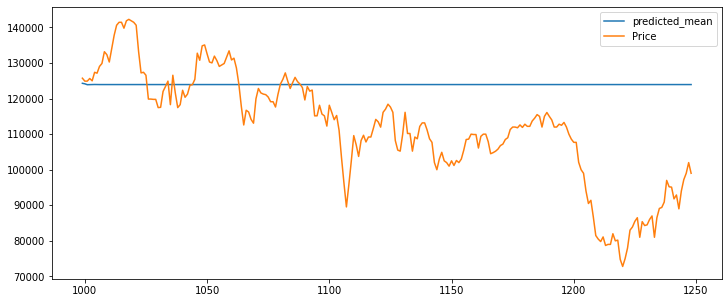

In [77]:
plt.figure(figsize = (12,5))
pred.plot(legend = True)
test['Price'].plot(legend= True)

In [78]:
# using autoarima to get best predictions
step= auto_arima(df.Price, trace=True)
step.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22622.318, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22630.427, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22628.778, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22628.749, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22628.598, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22627.775, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22632.111, Time=0.81 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22621.983, Time=0.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22622.176, Time=0.78 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=22622.908, Time=1.78 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22623.980, Time=1.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22622.066, Time=0.92 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=22620.963, Time=0.95 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=22618.971, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1249
Model:               SARIMAX(4, 1, 0)   Log Likelihood              -11303.552
Date:                Wed, 04 Jan 2023   AIC                          22617.105
Time:                        19:03:00   BIC                          22642.751
Sample:                             0   HQIC                         22626.747
                               - 1249                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0497      0.018      2.823      0.005       0.015       0.084
ar.L2         -0.0028      0.022     -0.127      0.899      -0.046       0.041
ar.L3         -0.0651      0.019     -3.460      0.001      -0.102      -0.028
ar.L4          0.0662      0.018      3.645      0.000       0.031       0.102
sigma2      4.307e+06   1.19e+05     36.235      0.000    4.07e+06    4.54e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):               284.75
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

mse =  mean_squared_error(pred, test['Price'])
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(pred, test['Price'])
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  19660.5997932831
MAPE:  12.339557586272461
